In [90]:
import nltk
import matplotlib.pyplot as plt

Here we will learn how to identify what the web page is about using `NLTK` in Python

First, we will grab a webpage and analyze the text to see what the page is about.

`urllib` module will help us to crawl the webpage

In [91]:
import urllib.request
response =  urllib.request.urlopen('https://kathmandupost.com/national/2020/05/19/house-should-decide-whether-to-endorse-mcc-compact-says-oli')
html=response.read()
print(html)

b'<!DOCTYPE html><html lang="en" ><head><meta charset="utf-8"><meta name="robots" content="" ><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="cache-control" content="no-cache" /><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no"><title>Parliament should decide whether to endorse MCC compact, Oli says</title><meta name="description" content="If political parties feel they don\xe2\x80\x99t need the MCC, they can ask their lawmakers to vote against it, the prime minister says."><meta name="keyword" content="Prime,minister,says,the,government,will,table,a,constitution,amendment,bill,in,Parliament,to,revise,the,country\xe2\x80\x99s,map,for,the,official,seal."><meta name="language" content="English"><meta name="revisit-after" content="1 day"><meta property="og:image:width" content="900" /><meta property="og:image:height" content="599" /><meta property="og:image:type" content="image/jpeg" /><meta property="og:image



We will use `Beautiful Soup` which is a Python library for pulling data out of HTML and XML files.

We will use beautiful soup to clean our webpage text of HTML tags.

In [92]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

Parliament should decide whether to endorse MCC compact, Oli saysimg.lazy{ background:rgba(100,70,44,0.5);}img.lazy{ background:#999;}.ui-menu { width: 150px; }.lazy{content:url("https://jcss-cdn.kathmandupost.com/assets/images/lazy.png");}/*Start of Lane Block*/.header-ads, .sponsor-header{ background:#f6f6f6;margin:0; border-bottom:solid 1px #efefef; position: relative; z-index:0;}.ads-block{/*background:#fff;*/ padding:4rem;}.ads-block img{ max-width: 100%; }.ads-block h1{ margin:0; color: #efefef; font-size:1.3rem;}.close-btn{ position: absolute;right:10px; top:10px; width: 24px; height: 24px; z-index: 2;}.ui-menu{ width: auto; }.close-btn{cursor: pointer;}/*End of Lane Block*//* roadblock */#roadblock-ad {position: fixed;text-align: center;top: 0;height: 100%;width: 100%;z-index: 9;min-height: 500px;}#roadblock-ad .wrap {display: -webkit-flex;display: -ms-flexbox;display: flex;-webkit-align-items: center;align-items: center;-webkit-justify-content: center;justify-content: center;h

Now we have clean text from the crawled web page, let’s convert the text into tokens.

In [93]:
tokens = [t for t in text.split()]
print(tokens)

['Parliament', 'should', 'decide', 'whether', 'to', 'endorse', 'MCC', 'compact,', 'Oli', 'saysimg.lazy{', 'background:rgba(100,70,44,0.5);}img.lazy{', 'background:#999;}.ui-menu', '{', 'width:', '150px;', '}.lazy{content:url("https://jcss-cdn.kathmandupost.com/assets/images/lazy.png");}/*Start', 'of', 'Lane', 'Block*/.header-ads,', '.sponsor-header{', 'background:#f6f6f6;margin:0;', 'border-bottom:solid', '1px', '#efefef;', 'position:', 'relative;', 'z-index:0;}.ads-block{/*background:#fff;*/', 'padding:4rem;}.ads-block', 'img{', 'max-width:', '100%;', '}.ads-block', 'h1{', 'margin:0;', 'color:', '#efefef;', 'font-size:1.3rem;}.close-btn{', 'position:', 'absolute;right:10px;', 'top:10px;', 'width:', '24px;', 'height:', '24px;', 'z-index:', '2;}.ui-menu{', 'width:', 'auto;', '}.close-btn{cursor:', 'pointer;}/*End', 'of', 'Lane', 'Block*//*', 'roadblock', '*/#roadblock-ad', '{position:', 'fixed;text-align:', 'center;top:', '0;height:', '100%;width:', '100%;z-index:', '9;min-height:', '50

## Count word Frequency
nltk offers a function **FreqDist()** which will do the job for us. Also, we will remove stop words (a, at, the, for etc) from our web page as we don't need them to hamper our word frequency count. We will plot the graph for most frequently occurring words in the webpage in order to get the clear picture of the context of the web page

In [94]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
    


Parliament:3
decide:5
whether:4
endorse:4
MCC:10
compact,:4
Oli:9
saysimg.lazy{:1
background:rgba(100,70,44,0.5);}img.lazy{:1
background:#999;}.ui-menu:1
{:4
width::3
150px;:1
}.lazy{content:url("https://jcss-cdn.kathmandupost.com/assets/images/lazy.png");}/*Start:1
Lane:2
Block*/.header-ads,:1
.sponsor-header{:1
background:#f6f6f6;margin:0;:1
border-bottom:solid:1
1px:3
#efefef;:2
position::2
relative;:1
z-index:0;}.ads-block{/*background:#fff;*/:1
padding:4rem;}.ads-block:1
img{:1
max-width::1
100%;:1
}.ads-block:1
h1{:1
margin:0;:1
color::1
font-size:1.3rem;}.close-btn{:1
absolute;right:10px;:1
top:10px;:1
24px;:2
height::1
z-index::1
2;}.ui-menu{:1
auto;:1
}.close-btn{cursor::1
pointer;}/*End:1
Block*//*:1
roadblock:1
*/#roadblock-ad:1
{position::4
fixed;text-align::1
center;top::1
0;height::1
100%;width::1
100%;z-index::1
9;min-height::1
500px;}#roadblock-ad:1
.wrap:1
{display::5
-webkit-flex;display::1
-ms-flexbox;display::1
flex;-webkit-align-items::1
center;align-items::1
cente

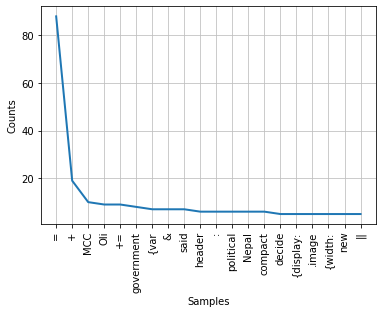

In [95]:
freq.plot(20, cumulative=False)

The code has correctly identified that the web page speaks about 
**Prime-minister Oli is Speaking about MCC**